In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_circles



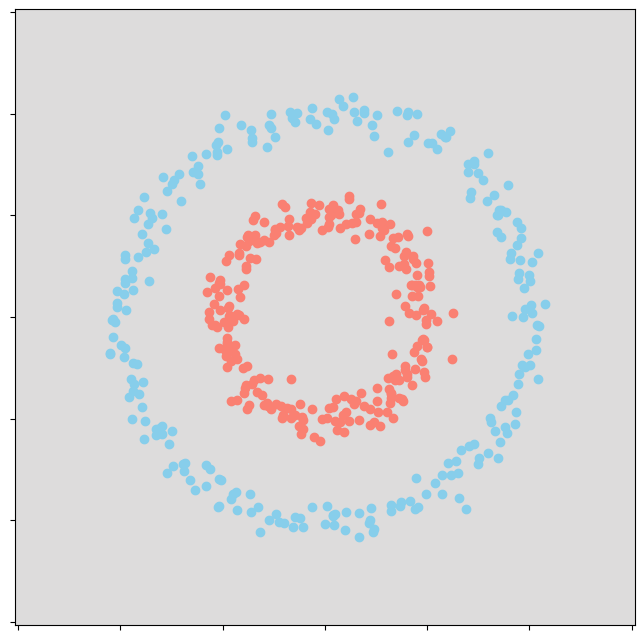

In [37]:
# Creamos los datos
# Creamos nuestros datos artificiales, donde buscaremos clasificar 
# dos anillos concéntricos de datos. 
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Resolución del mapa de predicción.
res = 100 

# Coordendadas del mapa de predicción.
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de predicción.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacio a 0.5 del mapa de predicción.
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

# Visualización de la nube de datos.
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_15660\2696521785.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Step 0 / 1000 - Loss =  0.44835222 - Acc = 0.5
Step 25 / 1000 - Loss =  0.4267771 - Acc = 0.556
Step 50 / 1000 - Loss =  0.41717437 - Acc = 0.552
Step 75 / 1000 - Loss =  0.4095221 - Acc = 0.556
Step 100 / 1000 - Loss =  0.40089756 - Acc = 0.56
Step 125 / 1000 - Loss =  0.39094564 - Acc = 0.562
Step 150 / 1000 - Loss =  0.37904105 - Acc = 0.57
Step 175 / 1000 - Loss =  0.36384976 - Acc = 0.572
Step 200 / 1000 - Loss =  0.33787763 - Acc = 0.584
Step 225 / 1000 - Loss =  0.30193788 - Acc = 0.704
Step 250 / 1000 - Loss =  0.27697766 - Acc = 0.716
Step 275 / 1000 - Loss =  0.23671424 - Acc = 0.69
Step 300 / 1000 - Loss =  0.21084139 - Acc = 0.69
Step 325 / 1000 - Loss =  0.19374849 - Acc = 0.7
Step 350 / 1000 - Loss =  0.17794739 - Acc = 0.73
Step 375 / 1000 - Loss =  0.16260459 - Acc = 0.77
Step 400 / 1000 - Loss =  0.14786488 - Acc = 0.842
Step 425 / 1000 - Loss =  0.13383225 - Acc = 0.92
Step 450 / 1000 - Loss =  0.12097108 - Acc = 0.936
Step 475 / 1000 - Loss =  0.109448165 - Acc = 0.9

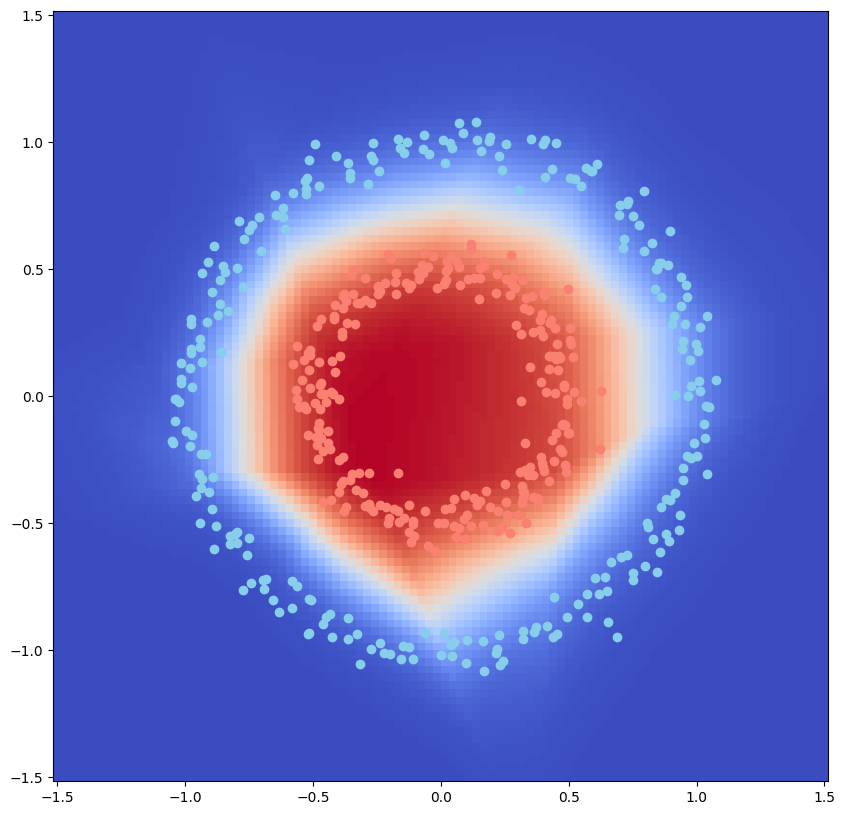

In [43]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from matplotlib import animation
from IPython.core.display import display, HTML

# Definimos los puntos de entrada de la red, para la matriz X e Y.
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])

lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.

# Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')

l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')

l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

# Vector de predicciones de Y.
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]


# Evaluación de las predicciones.
loss = tf.losses.mean_squared_error(pY, iY)

# Definimos al optimizador de la red, para que minimice el error.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

n_steps = 1000 # Número de ciclos de entrenamiento.

iPY = [] # Aquí guardaremos la evolución de las predicción, para la animación.

with tf.Session() as sess:
  
  # Inicializamos todos los parámetros de la red, las matrices W y b.
  sess.run(tf.global_variables_initializer())
    
  # Iteramos n pases de entrenamiento.
  for step in range(n_steps):
  
    # Evaluamos al optimizador, a la función de coste y al tensor de salida pY. 
    # La evaluación del optimizer producirá el entrenamiento de la red.
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ iX : X, iY : Y })
    
    # Cada 25 iteraciones, imprimimos métricas.
    if step % 25 == 0: 
      
      # Cálculo del accuracy.
      acc = np.mean(np.round(_pY) == Y)
      
      # Impresión de métricas.
      print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', acc)
      
      # Obtenemos predicciones para cada punto de nuestro mapa de predicción _pX.
      _pY = sess.run(pY, feed_dict={ iX : _pX }).reshape((res, res))

      # Y lo guardamos para visualizar la animación.
      iPY.append(_pY)
      
  
# ----- CÓDIGO ANIMACIÓN ----- #

ims = []

fig = plt.figure(figsize=(10, 10))

print("--- Generando animación ---")

for fr in range(len(iPY)):
  
  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)

  # Visualización de la nube de datos.
  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

  # plt.title("Resultado Clasificación")
  #plt.tick_params(labelbottom=False, labelleft=False)

  #ims.append([im])

#ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

#HTML(ani.to_html5_video())

In [53]:
import tensorflow.keras as kr

lr= 0.01
nn=[2,16,8,1]

#creamos la estructura que contendrá nuestro modelo.
model=kr.Sequential()

#capa 1
model.add(kr.layers.Dense(nn[1],activation='relu'))

#capa 2
model.add(kr.layers.Dense(nn[2],activation='relu'))

#capa 3
model.add(kr.layers.Dense(nn[3],activation='sigmoid'))

# Compilamos el modelo, definiendo la función de coste y el optimizador.
model.compile(loss='mse', optimizer=kr.optimizers.SGD(lr=lr), metrics=['acc'])

# Y entrenamos al modelo. Los callbacks 
model.fit(X, Y, epochs=100)

Train on 500 samples
Epoch 1/100
500/500 [==============================] - 0s 104us/sample - loss: 0.2532 - acc: 0.4940
Epoch 2/100
500/500 [==============================] - 0s 15us/sample - loss: 0.2529 - acc: 0.4980
Epoch 3/100
500/500 [==============================] - 0s 14us/sample - loss: 0.2527 - acc: 0.4940
Epoch 4/100
500/500 [==============================] - 0s 18us/sample - loss: 0.2525 - acc: 0.4880
Epoch 5/100
500/500 [==============================] - 0s 16us/sample - loss: 0.2522 - acc: 0.4980
Epoch 6/100
500/500 [==============================] - 0s 20us/sample - loss: 0.2520 - acc: 0.5020
Epoch 7/100
500/500 [==============================] - 0s 13us/sample - loss: 0.2518 - acc: 0.4900
Epoch 8/100
500/500 [==============================] - 0s 17us/sample - loss: 0.2515 - acc: 0.4940
Epoch 9/100
500/500 [==============================] - 0s 17us/sample - loss: 0.2513 - acc: 0.4940
Epoch 10/100
500/500 [==============================] - 0s 14us/sample - loss: 0.2511 -

In [60]:
model.predict(X)

c:\Users\Francisco\anaconda3\envs\cursoIA\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


array([[0.52460593],
       [0.48883075],
       [0.51996946],
       [0.46804583],
       [0.5204917 ],
       [0.44509378],
       [0.49615884],
       [0.4291689 ],
       [0.50108546],
       [0.4965979 ],
       [0.4199204 ],
       [0.5163169 ],
       [0.5154146 ],
       [0.4820849 ],
       [0.5235912 ],
       [0.50361705],
       [0.46890002],
       [0.46428707],
       [0.49111286],
       [0.48444843],
       [0.45528057],
       [0.46425432],
       [0.4093212 ],
       [0.40865794],
       [0.4907811 ],
       [0.5105096 ],
       [0.4632817 ],
       [0.40624106],
       [0.5052089 ],
       [0.5077897 ],
       [0.49717125],
       [0.46888816],
       [0.47386917],
       [0.47061673],
       [0.48550594],
       [0.491421  ],
       [0.5122701 ],
       [0.5032661 ],
       [0.50820005],
       [0.47600552],
       [0.45745015],
       [0.5073749 ],
       [0.5055259 ],
       [0.4751926 ],
       [0.4984222 ],
       [0.49619943],
       [0.52186215],
       [0.413